In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils.centroids import centroid_sources
from photutils.centroids import (centroid_1dg, centroid_2dg, centroid_com, centroid_quadratic)
import sep

In [11]:
# function to find the exact coords of the sn using a guess of where it is
# also plots an img with a marker on it just cause lol
# boxsize is size of the box for the img it generates
# img has to be in quotes lmao
# guess_x, guess_y is the approx location of the sn in the post expl img (in pxls)

# test later w/other images lmaoooooooo
# also too lazy to generalize boxsize since i tried it with another size and i got a meh
def coord_loc(fits_img, guess_x, guess_y, boxsize):
    test = fits.open(fits_img)
    data = test[1].data
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.imshow(data[round(guess_y-boxsize/2):round(guess_y+boxsize/2), #zooms in 250x!
                   round(guess_x-boxsize/2):round(guess_x+boxsize/2)], origin='lower', interpolation='nearest') 
    x, y = centroid_sources(data, guess_x, guess_y, box_size=21, centroid_func=centroid_com)
    plt.plot(x/250, y/250, color= "red" , marker= "+", ms=15, mew=2.0)
    print(x)  
    print(y)
    test.close()

[1373.76665144]
[2427.96649758]


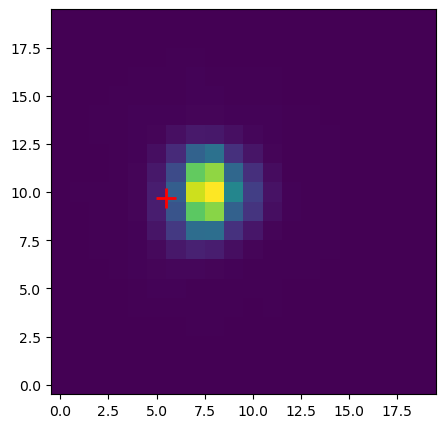

In [13]:
coord_loc("iey918020_drc.fits", 1376, 2428, 20)